In [5]:
#Course  : DSC530
#Name : Tejashri Bhilare
#Week 4

#Page 35-36: 3-1 (Something like the class size paradox appears if you survey children and ask how many children are in their family…)


In [17]:
#import libraries

from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import thinkstats2
import thinkplot



In [3]:
#Here we will be loading  NSFG pregnancy file and  will select live births

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

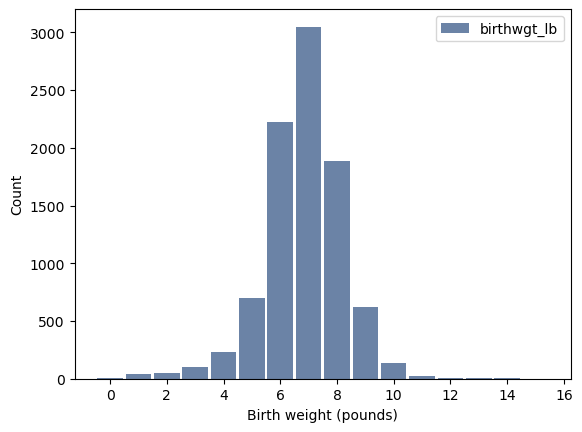

In [4]:
#Code for generating histogram of birth weights

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

In [5]:
# Here for normalize the disrtibution, we will divide through by the total count.

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n
    
    # Here the result of above code is a Probability Mass Function (PMF).

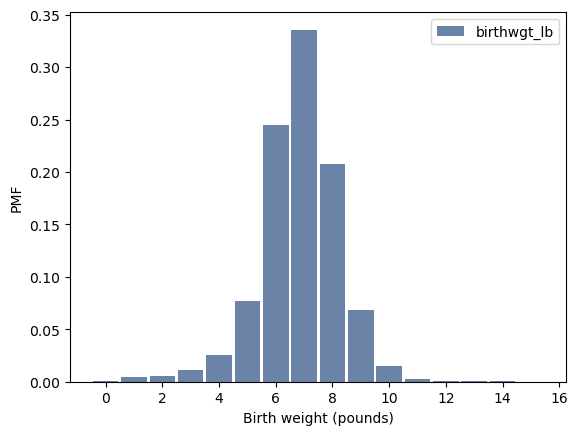

In [14]:
# Here generating histogram of PMF

thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

In [6]:
#create a Pmf object.

pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [7]:
#Pmf provides Prob, which looks up a value and returns its probability:

pmf.Prob(2)

0.4

In [8]:
#The Incr method adds to the probability associated with a given values.
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

In [9]:
#The Mult method multiplies the probability associated with a value.

pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

In [10]:
#Total returns the total probability (which is no longer 1, because we changed one of the probabilities).

pmf.Total()

0.8999999999999999

In [11]:
#Normalize divides through by the total probability, making it 1 again.


pmf.Normalize()
pmf.Total()

1.0

In [12]:
#Here's the PMF of pregnancy length for live births.


pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

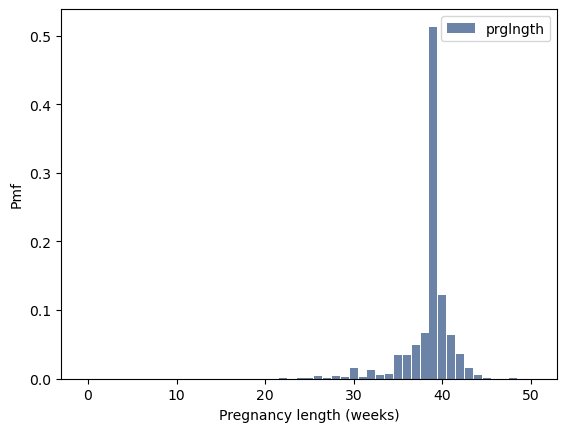

In [13]:
#Here's what it looks like plotted with Hist, which makes a bar graph.


thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

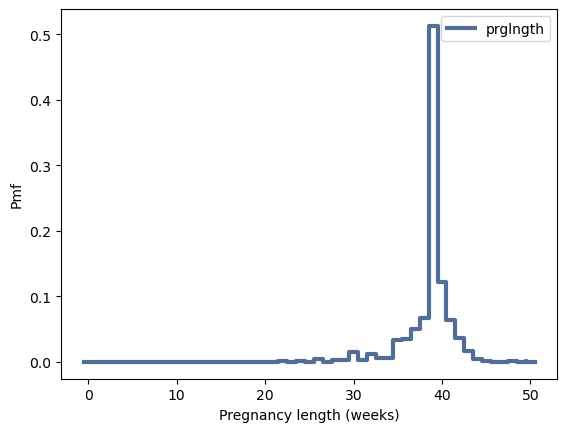

In [14]:
#Here's what it looks like plotted with Pmf, which makes a step function.

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

In [21]:

#Page 47: 4-1 (How much did you weigh at birth? If you don’t know, call your mother or someone else who knows…)

#Page 48: 4-2 (The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability…)


import numpy as np





In [22]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded first.py


In [23]:
import thinkstats2
import thinkplot

In [24]:
#One more time, will load the data from the NSFG.

import first

live, firsts, others = first.MakeFrames()

In [25]:
#And compute the distribution of birth weight for first babies and others.

first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


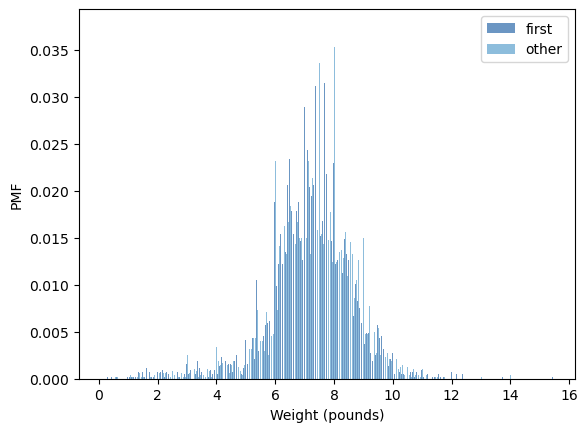

In [26]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [27]:
#PercentileRank computes the fraction of scores less than or equal to your_score.


def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [28]:
#this is the list of scores.

t = [55, 66, 77, 88, 99]

In [29]:
#If you got the 88, your percentile rank is 80.


PercentileRank(t, 88)

80.0

In [30]:
#Percentile takes a percentile rank and computes the corresponding percentile.

def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [31]:
#The median is the 50th percentile, which is 77.

Percentile(t, 50)

77

In [32]:
#more efficient way to compute percentiles.

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[int(index)]

In [33]:
Percentile2(t, 50)

77

In [34]:
#The Cumulative Distribution Function (CDF) is almost the same as PercentileRank. The only difference is that the result is 0-1 instead of 0-100.


def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In [35]:
#list


t = [1, 2, 2, 3, 5]

In [36]:
#evaluate the CDF for various values:


EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)


(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

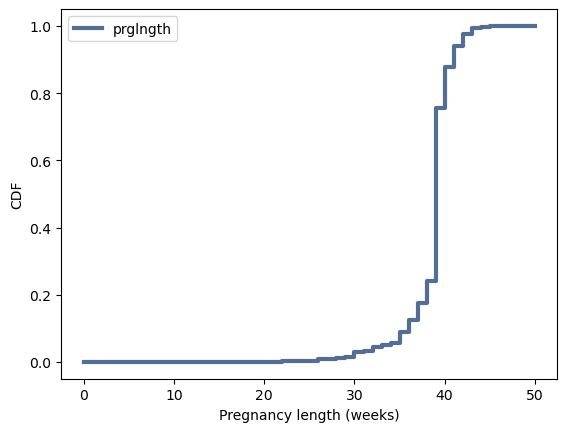

In [37]:
#example using real data, the distribution of pregnancy length for live births.





In [38]:
#Cdf provides Prob, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.
#For example, 94% of pregnancy lengths are less than or equal to 41




0.9406427634455619

In [39]:
#Value evaluates the inverse CDF; given a fraction, it computes the corresponding value. 
#For example, the median is the value that corresponds to 0.5.


cdf.Value(0.5)

39

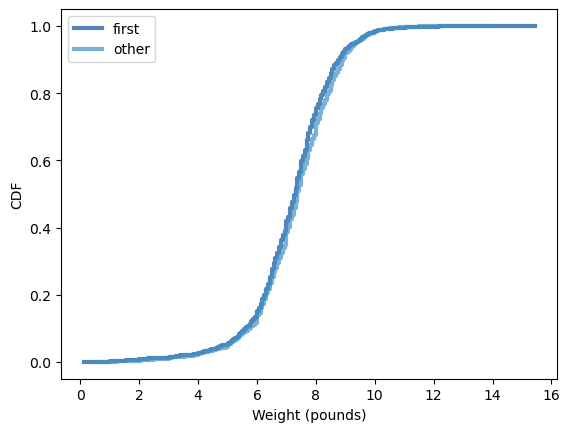

In [40]:
# CDFs are a good way to visualize distributions. They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.



first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [41]:
#In this example, we can see that first babies are slightly, but consistently, lighter than others.

# Here We can use the CDF of birth weight to compute percentile-based statistics.

weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')






In [43]:
#Again, the median is the 50th percentile.

median = live_cdf.Percentile(50)
median

7.375

In [44]:
#The interquartile range is the interval from the 25th to 75th percentile.

iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

In [45]:
#We can use the CDF to look up the percentile rank of a particular value. 
#For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile

live_cdf.PercentileRank(10.2)

98.82717415357381

In [46]:
#If we draw a random sample from the observed weights and map each weigh to its percentile rank.

sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

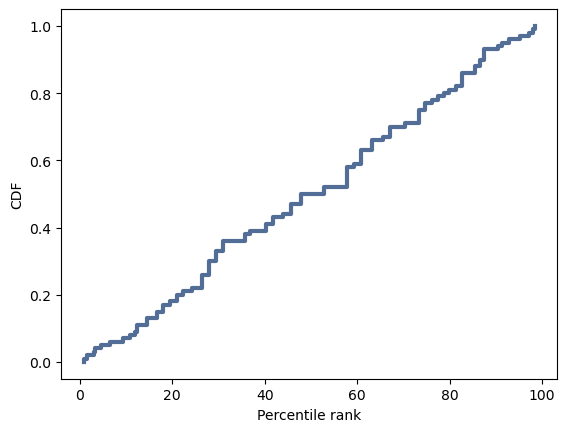

In [47]:
#The resulting list of ranks should be approximately uniform from 0-1.

rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

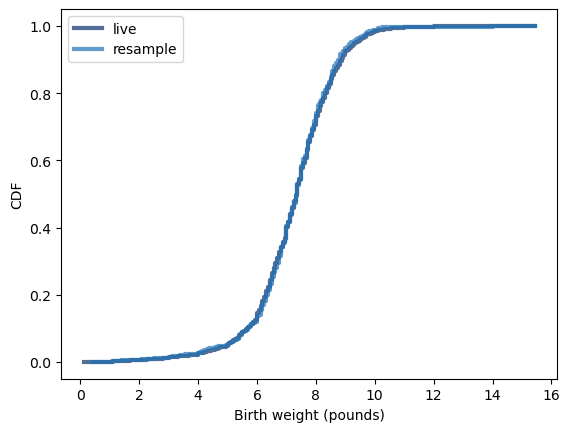

In [48]:
#That observation is the basis of Cdf.Sample, which generates a random sample from a Cdf. Here's an example.

resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

In [49]:
#Exercise: How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.


## Solution

cdf.PercentileRank(8.5)

0.021862702229995628

In [50]:


other_cdf.PercentileRank(8.5)

82.35294117647058

In [51]:
#Exercise: The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

#Generate 1000 numbers from random.random and plot their PMF and CDF. Is this distribution uniform?

# Solution

t = np.random.random(1000)

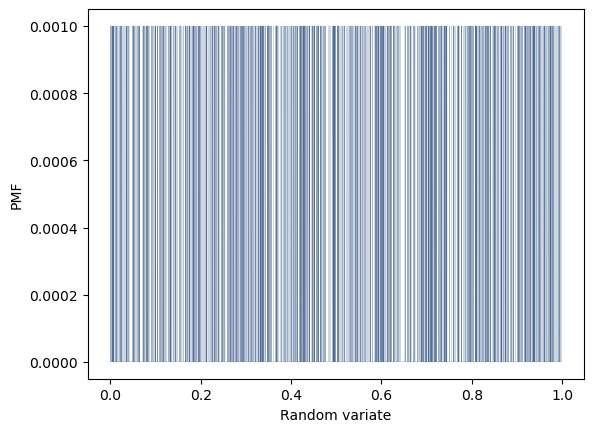

In [52]:
# Solution

pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

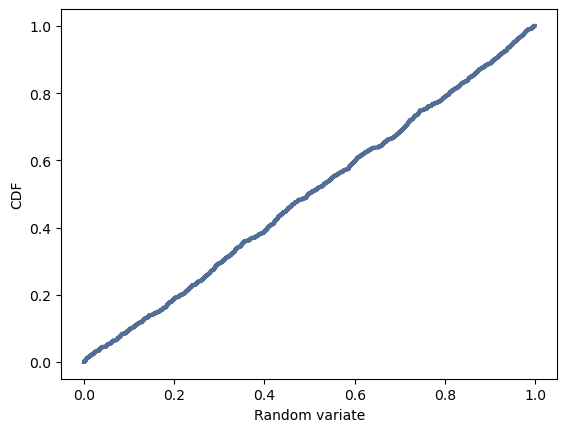

In [53]:
# Solution

cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')